In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

In [3]:
digits = load_digits()

* **n_clusters** -> The number of clusters to form as well as the number of centroids to generate.
* **init**
    * 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is "greedy k-means++". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.
    * 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.
* **max_iter** -> Maximum number of iterations of the k-means algorithm for a single run.


In [4]:
?KMeans

In [5]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 50,
    "max_iter": 500,
    "random_state": 0
}

In [6]:
pipeline = Pipeline([
    ("Preprocess", MinMaxScaler()),
    ("Clustering", KMeans(n_clusters=10, **kmeans_kwargs))])

pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

In [7]:
cluster_centers = pipeline[-1].cluster_centers_

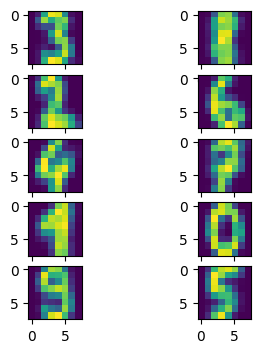

In [8]:
#visualising cluster centroids
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10, 8, 8)):
    i.imshow(j)

Finding optimal K: Elbow method

In [9]:
sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digit.append(kmeans.inertia_)

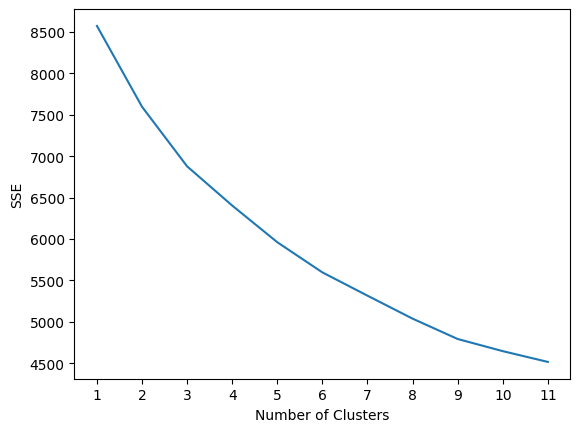

In [10]:
# plotting

plt.plot(range(1,12), sse_digit)
plt.xticks(range(1,12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Silhoutte

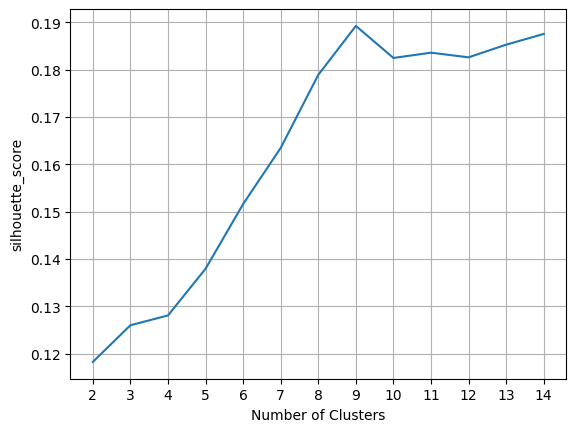

In [11]:
sil_coef_digits = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

plt.plot(range(2,15), sil_coef_digits)
plt.xticks(range(2,15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_score")
plt.grid(True)
plt.show()

In [12]:
print(np.argmax(sil_coef_digits) + 2)

9
